In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#set a random number seed
np.random.seed(119)

#set number of data points
npoints = 50

#set x
x = np.linspace(0,10.,npoints)

#set slope, intercept, and scatter rms
m = 2.0
b = 1.0
sigma = 2.0

#generate y points
y = m*x + b + np.random.normal(scale=sigma,size=npoints)
y_err = np.full(npoints,sigma)

Text(0, 0.5, 'y')

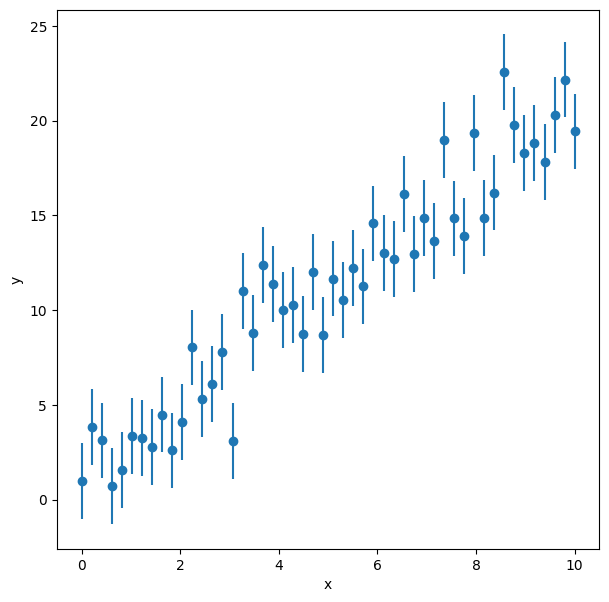

In [4]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [5]:
m_fit, b_fit = np.poly1d(np.polyfit(x, y, 1, w=1./y_err))   #weight with uncertainties
print(m_fit, b_fit)

y_fit = m_fit * x + b_fit

1.963404347039951 1.2830106812961934


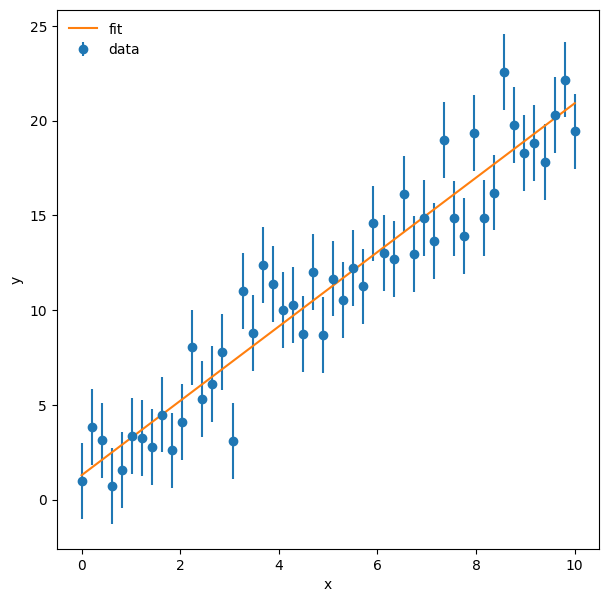

In [6]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)

Text(0, 0.5, 'y')

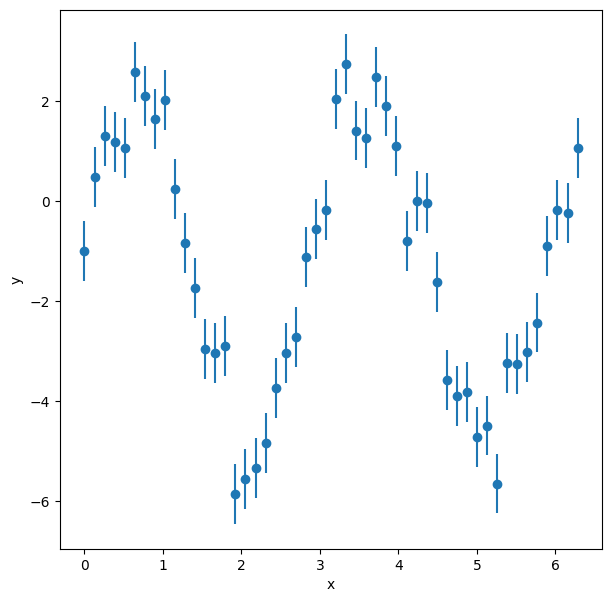

In [7]:
#redefine x and y
npoints = 50
x = np.linspace(0.,2*np.pi,npoints)

#make y a complicated function
a = 3.4
b = 2.1
c = 0.27
d = -1.3
sig = 0.6

y = a * np.sin( b*x + c) + d + np.random.normal(scale=sig, size=npoints)
y_err = np.full(npoints,sig)

f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [8]:
#import optimize from scipy
from scipy import optimize

In [11]:
#define the function to fit
def f_line(x, a, b, c, d):
    return a * np.sin( b*x + c) + d

#perform the fit
params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err,p0=[1,2.,0.1,-0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3] 

print(a_fit,b_fit,c_fit,d_fit)

y_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit

3.4848877355669767 2.0987157396290463 0.24946481050057018 -1.332153584957747


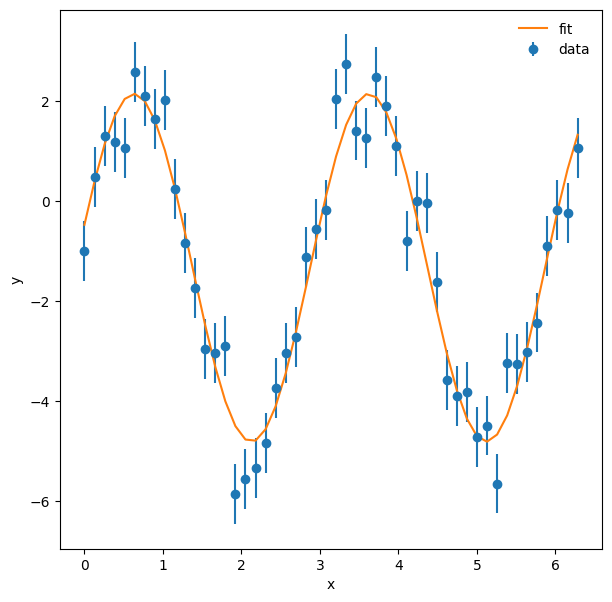

In [12]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0,frameon=False)

In [ ]:
i